## Introduction

In this notebook, we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. 

In [63]:
# Dependencies and Setup
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Retrieving the Data

There are 7 different sources of data:
* application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

* bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

* bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [2]:
# Read csv
application_train_df = pd.read_csv("Resource/application_train.csv")
application_test_df = pd.read_csv("Resource/application_test.csv")
bureau_df = pd.read_csv("Resource/bureau.csv")
# bureau_balance_df = pd.read_csv("Resource/bureau_balance.csv")
# credit_card_balance_df  = pd.read_csv("Resource/credit_card_balance.csv")
# installments_payments_df = pd.read_csv("Resource/installments_payments.csv")
# pos_cash_df = pd.read_csv("Resource/POS_CASH_balance.csv")
# previous_application_df = pd.read_csv("Resource/previous_application.csv")
# sample_submission_df = pd.read_csv("Resource/sample_submission.csv")

In [ ]:
# print(application_train_df.shape)
# print(application_test_df.shape)
# print(bureau_balance_df.shape)
# print(bureau_df.shape)
# print(credit_card_balance_df.shape)
# print(installments_payments_df.shape)
# print(pos_cash_df.shape)
# print(previous_application_df.shape)
# print(sample_submission_df.shape)

In [ ]:
# application_test_columns = list(application_test_df.columns)
# bureau_balance_columns = list(bureau_balance_df.columns)
# bureau_columns = list(bureau_df.columns)
# credit_card_balance_columns = list(credit_card_balance_df.columns)
# installments_payment_columns = list(installments_payments_df.columns)
# pos_cash_columns = list(pos_cash_df.columns)
# previous_application_columns = list(previous_application_df.columns)
# sample_submission_columns = list(sample_submission_df.columns)

In [ ]:
# print([i for i in bureau_balance_columns if i in application_test_columns])
# print([i for i in bureau_columns if i in application_test_columns])
# print([i for i in credit_card_balance_columns if i in application_test_columns])
# print([i for i in installments_payment_columns if i in application_test_columns])
# print([i for i in pos_cash_columns if i in application_test_columns])
# print([i for i in previous_application_columns if i in application_test_columns])
# print([i for i in sample_submission_columns if i in application_test_columns])

* SK_ID_CURR - ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 
* SK_BUREAU_ID - Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
* CREDIT_ACTIVE - Status of the Credit Bureau (CB) reported credits
* CREDIT_CURRENCY - Recoded currency of the Credit Bureau credit
* DAYS_CREDIT - How many days before current application did client apply for Credit Bureau credit
* CREDIT_DAY_OVERDUE - Number of days past due on CB credit at the time of application for related loan in our sample
* DAYS_CREDIT_ENDDATE - Remaining duration of CB credit (in days) at the time of application in Home Credit
* DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application in Home Credit (only for closed credit)
* AMT_CREDIT_MAX_OVERDUE - Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
* CNT_CREDIT_PROLONG - How many times was the Credit Bureau credit prolonged
* AMT_CREDIT_SUM - Current credit amount for the Credit Bureau credit
* AMT_CREDIT_SUM_DEBT - Current debt on Credit Bureau credit
* AMT_CREDIT_SUM_LIMIT - Current credit limit of credit card reported in Credit Bureau
* AMT_CREDIT_SUM_OVERDUE - Current amount overdue on Credit Bureau credit
* CREDIT_TYPE - Type of Credit Bureau credit (Car, cash,...)
* DAYS_CREDIT_UPDATE - How many days before loan application did last information about the Credit Bureau credit come
* AMT_ANNUITY - Annuity of the Credit Bureau credit

## Data Exploration

### Application Train Dataframe

In [3]:
application_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(application_train_df.shape)
print(application_train_df.info())

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [5]:
# calculate the data missing percentage
application_train_df = application_train_df.drop_duplicates()
application_train_df_missing = application_train_df.isna()
application_train_df_num_missing = application_train_df_missing.sum()
missing_percent = application_train_df_num_missing/len(application_train_df)*100

In [6]:
#missing data percentage output
missing_percent_df = missing_percent.to_frame(name="Missing Percentage (%)")
missing_percent_df = missing_percent_df.sort_values(by="Missing Percentage (%)",ascending=False)
missing_percent_df.head(20)

,Missing Percentage (%)
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


The Training Data frame has a high volume of missing data, we in order to make a relative acurrate training, we will keep all the data for right now and drop it later after feature selection step or try to fill the missing data by XGBoost

### Step 1: Data Cleaning & Preprocessing
Try to screen each column and determine if the datatype or values are useful as feature in further data process

* #### Check age outlier

In [7]:
age = application_train_df.DAYS_BIRTH/-365
age.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

* #### Check days employed outlier

In [8]:
employ_days = application_train_df.DAYS_EMPLOYED/-365
employ_days.describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

The employ days 365343 seems like a default value, we remove the value of 365343 check the rest of the values

In [9]:
application_train_df.DAYS_EMPLOYED.replace({365243: np.nan}, inplace = True)
employ_days_remove = application_train_df.DAYS_EMPLOYED/-365
employ_days_remove.describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

The employ days becomes normal after we use NaN to replace 365343

* #### Check days of registration outlier

In [10]:
registration_days = application_train_df.DAYS_REGISTRATION/-365
registration_days.describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

* #### Check days of ID publish outlier

In [11]:
id_days = application_train_df.DAYS_ID_PUBLISH/-365
id_days.describe()

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

* #### Label Encoding

In [12]:
application_train_df.dtypes.value_counts()

float64    66
int64      40
object     16
dtype: int64

In [13]:
#convert all categorical variables to encoding variables
label_encoder = LabelEncoder()

for i in application_train_df:
    if application_train_df[i].dtype == 'object': 
        if len(list(application_train_df[i].unique())) <= 2:
            label_encoder.fit(application_train_df[i])
            application_train_df[i] = label_encoder.transform(application_train_df[i])
            application_test_df[i] = label_encoder.transform(application_test_df[i])
            print(i)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY


In [14]:
# one-hot encoding of categorical variables larger than two unique values, snce we don`t want to add any weight 
# on the categorical variables
application_train_df = pd.get_dummies(application_train_df)
application_test_df = pd.get_dummies(application_test_df)
print(application_train_df.shape)
print(application_test_df.shape)

(307511, 243)
(48744, 239)


In [17]:
#Aligning Training and Testing Data
train_labels = application_train_df.TARGET

# Align the training and testing data, keep only columns present in both dataframes
application_train_df, application_test_df = application_train_df.align(application_test_df, join = 'inner', axis = 1)

# Add the target back in
application_train_df['TARGET'] = train_labels

print('Training Features shape: ', application_train_df.shape)
print('Testing Features shape: ', application_test_df.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Step 2: Feature Selection

#### 1. Filter Method
#### Pearson correlation

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

or

* 00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

In [24]:
# Generating the correlation matrix
# Set SK_ID_CURR as index
app_train_df = application_train_df.copy()
app_train_df = app_train_df.set_index('SK_ID_CURR')
app_test_df = application_test_df.copy()
app_test_df = app_test_df.set_index('SK_ID_CURR')

In [39]:
#generating the correlation matrix
corr = app_train_df.corr()
#Correlation with output variable
cor_target = abs(corr["TARGET"])
type(cor_target)
correlation=cor_target.sort_values(ascending=False)
print(correlation.head(20))
print(correlation.tail(20))

TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INC

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

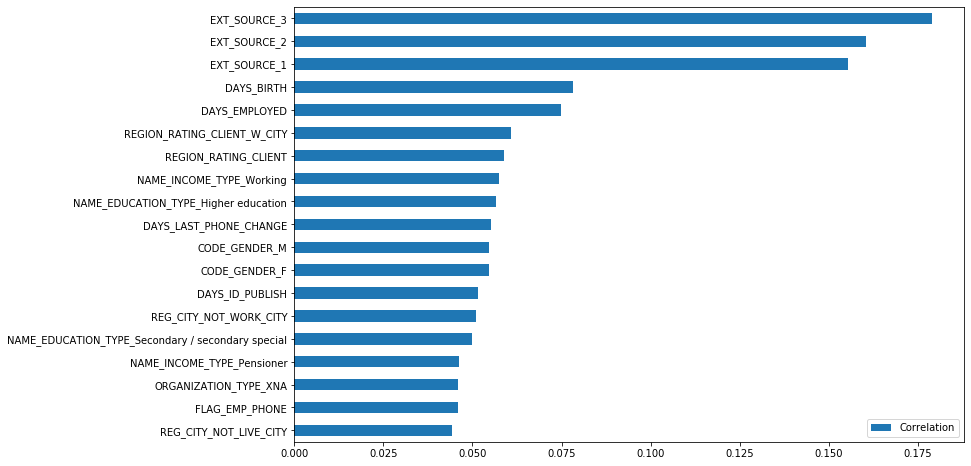

In [89]:
# convert top 20 correlation to df
df_corr = correlation.head(20).to_frame(name="Correlation")
df_corr = df_corr[1:].sort_values(by='Correlation',ascending=True)
df_corr.plot(kind = 'barh',figsize = (12,8))
plt.show()

### bureau dataset

In [ ]:
bureau_df.head()

In [ ]:
bureau_df.count()